# What are the Digital Humanities

A few lines of code to explore the dataset used by the [What is Digital Humanities](https://whatisdigitalhumanities.com/). The website randomly loads one of 817 definitions collected from participants from the Day of DH between 2009-2014.

We load the definitions stored in a [CSV file](https://github.com/hepplerj/whatisdigitalhumanities/blob/master/dayofquotes_full.csv) downloaded from the GitHub repository of the project. We count the words and we use a simple visualization (a word cloud) to explore the vocabulary.

## Load the data

In [11]:
import csv

with open('../data/dayofquotes_edited.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    lines = [r for r in csvreader]


In [2]:
lines[1]

['The thoughtful use of computing in humanistic inquiry and the thinking through of computing from the perspective of the traditions of the humanities.',
 'Geoffrey Rockwell',
 '2012-01-01']

In [14]:
definitions = '\n'.join([l[0] for l in lines[1:]]).lower()

In [15]:
definitions[:40]

'the thoughtful use of computing in human'

We can use a couple of options to search and counts the occurrences of a certain pattern or a string within the text of the definitions that we saved in the `definition` variable, like:
- `finditer` of the `re` library to search for all occurrences using regular expression
- the `count` method to simply get the number of occurrences

For instances, how many times is the string "digital_humanities" used? Or what all the occurrences of the acronym dh (also spelled DH)?

In [39]:
import re

matches = re.finditer(r'\bdh\b', definitions, re.IGNORECASE)

In [43]:
for m in matches:
    start, stop = m.span()
    try:
        print(definitions[start -25: stop + 25].replace('\n', ' '))
    except IndexError:
        print(m.group(), start, stop)

# let's print the total number of matches 
print(definitions.count('digital_humanities'))

123


## Get rid of the most frequent words (stopwords)

In [44]:
with open('../data/en-stopwords.txt') as f:
    stops = [w.strip('\n') for w in f.readlines()]

In [45]:
stops[-5:]

["you've", 'your', 'yours', 'yourself', 'yourselves']

However, it's not enough to get rid of frequent words like 'that' or 'of'. Since we're dealing with a list of definitions of Digital Humanities, I expect the phrase "Digital Humanities" and the acronym "DH" to be quite frequent, but not very informative (we *know* that this texts talk about DH!). At the same time I'd like to keep the separate words `digital` and `humanities` too...

How do we do that?

In [55]:
stops += ['digital_humanities', 'dh']

## Create the wordclouds

We need a library to be able to do that...

In [7]:
%pip install wordcloud pip matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                    #   collocations=False,
                      stopwords=stops).generate(definitions)

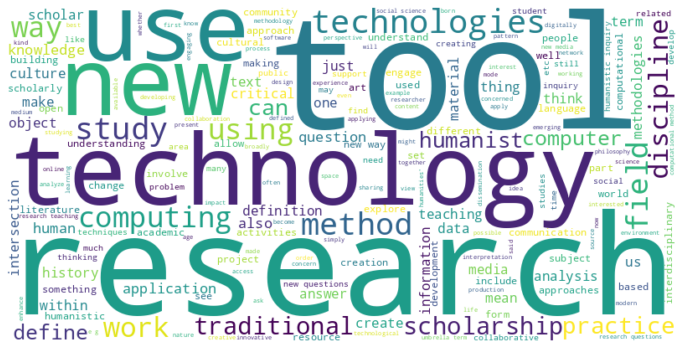

In [57]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()